In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load and Explore the data
train_dir=r"C:\IICET\DEEP_LEARNING_ALGORITHM\tiger\train"
test_dir=r"C:\IICET\DEEP_LEARNING_ALGORITHM\tiger\test"

# cheak the number of image in each class
print(f"number of lion images in training set:{len(os.listdir(os.path.join(train_dir,'lion')))}")
print(f"number of lion images in testing set:{len(os.listdir(os.path.join(test_dir,'lion')))}")
print(f"number of tiger images in testing set:{len(os.listdir(os.path.join(train_dir,'tiger')))}")
print(f"number of tiger images in testing set:{len(os.listdir(os.path.join(test_dir,'tiger')))}")


number of lion images in training set:180
number of lion images in testing set:20
number of tiger images in testing set:180
number of tiger images in testing set:20


Lion Images:


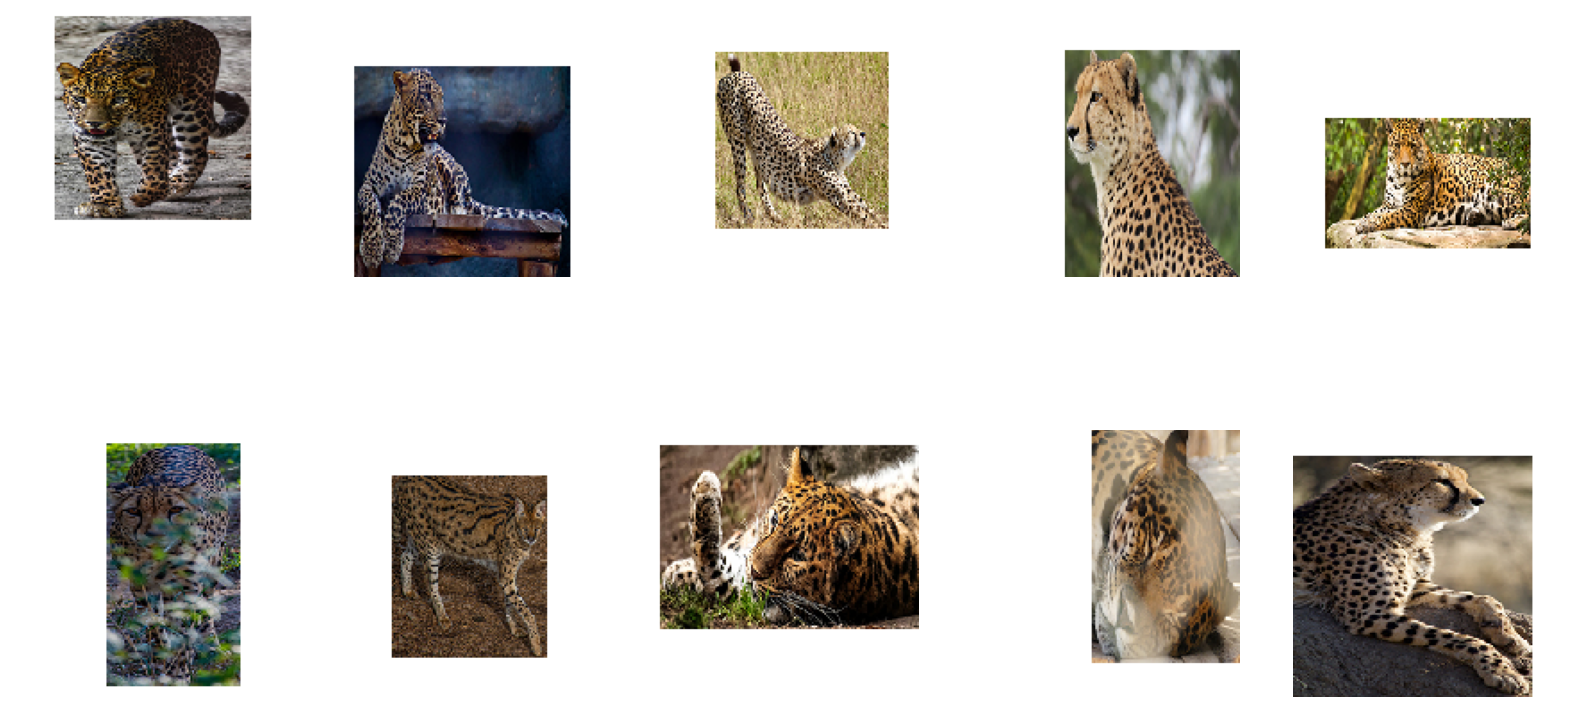

Tiger Images:


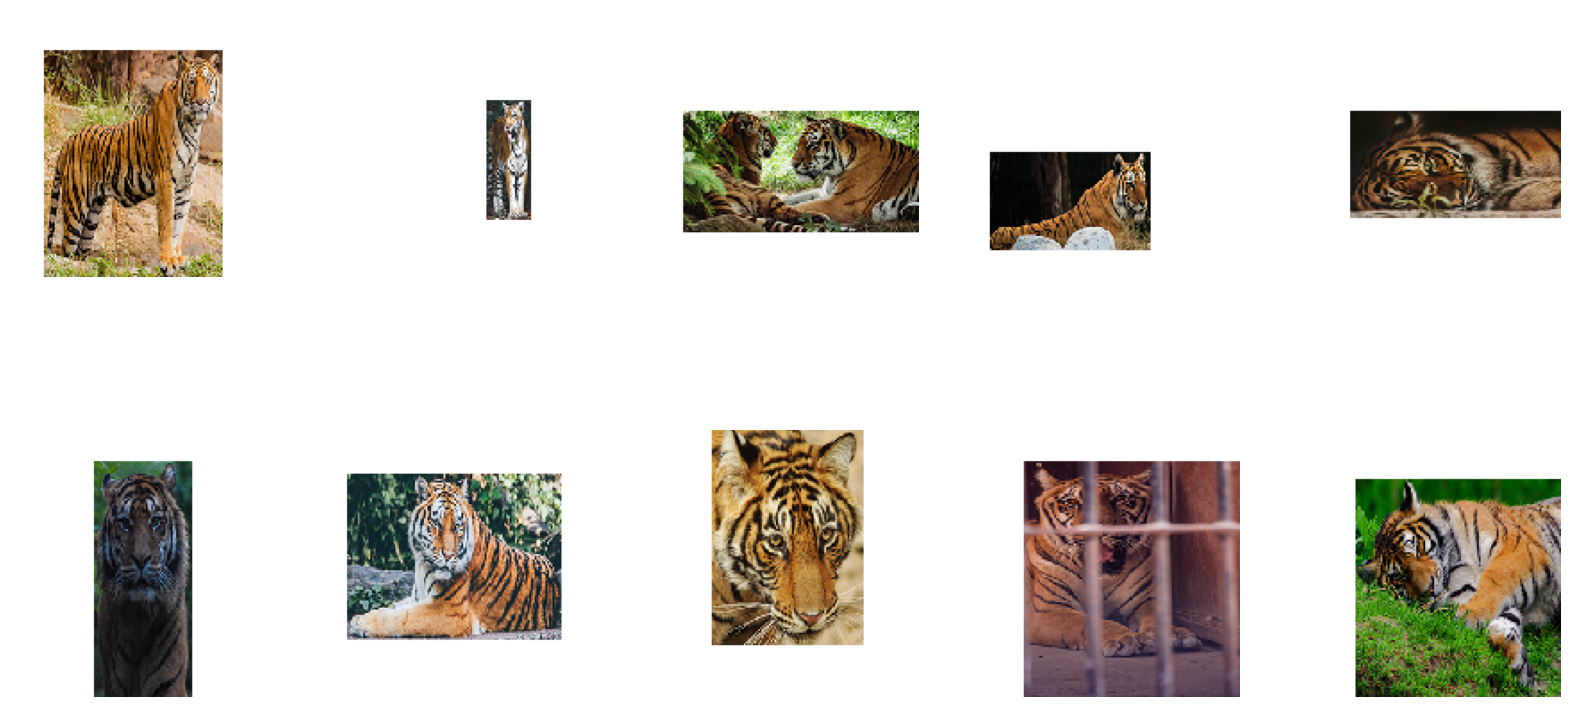

In [3]:
# display sample images
def display_images(class_name, num_images):
    class_dir= os.path.join(train_dir, class_name)
    images=os.listdir(class_dir)
    plt.figure(figsize=(20,10))
    for i in range(num_images):
        plt.subplot(2,5,i+1)
        img=load_img(os.path.join(class_dir, images[i]),target_size=(150,150))
        plt.imshow(img)
        plt.axis('off')
    plt.show()

print("Lion Images:")
display_images('lion', 10)

print("Tiger Images:")
display_images('tiger', 10)

In [36]:
# Data augmentation and Preprocessing

# Image data generator with data augmentation
train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen= ImageDataGenerator(rescale=1./255)


# Generate training data
train_generator= train_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

# Generate test data
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)



Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [37]:
model= Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(512,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
Dense(256, activation='relu'),
Dense(1,activation='sigmoid')
])

In [38]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
# Train the model
history=model.fit(
    train_generator,
    epochs=200,
    validation_data=test_generator
)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5833 - loss: 1.0532 - val_accuracy: 0.5000 - val_loss: 0.6993
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step - accuracy: 0.5417 - loss: 0.6801 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6928
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - accuracy: 0.4833 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 410ms/step - accuracy: 0.5000 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step - accuracy: 0.4896 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 406ms/step - accuracy: 0.5104 - loss: 0.6923 - val_accuracy: 0.5000 - val_

In [42]:
# Evaluate the Model
loss, accuracy= model.evaluate(test_generator)
print(f'Validation Accuracy: {accuracy*100:.2f}%') 
print(f'Validation Loss: {loss}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6854 - loss: 0.5191 
Validation Accuracy: 70.00%
Validation Loss: 0.5154901742935181


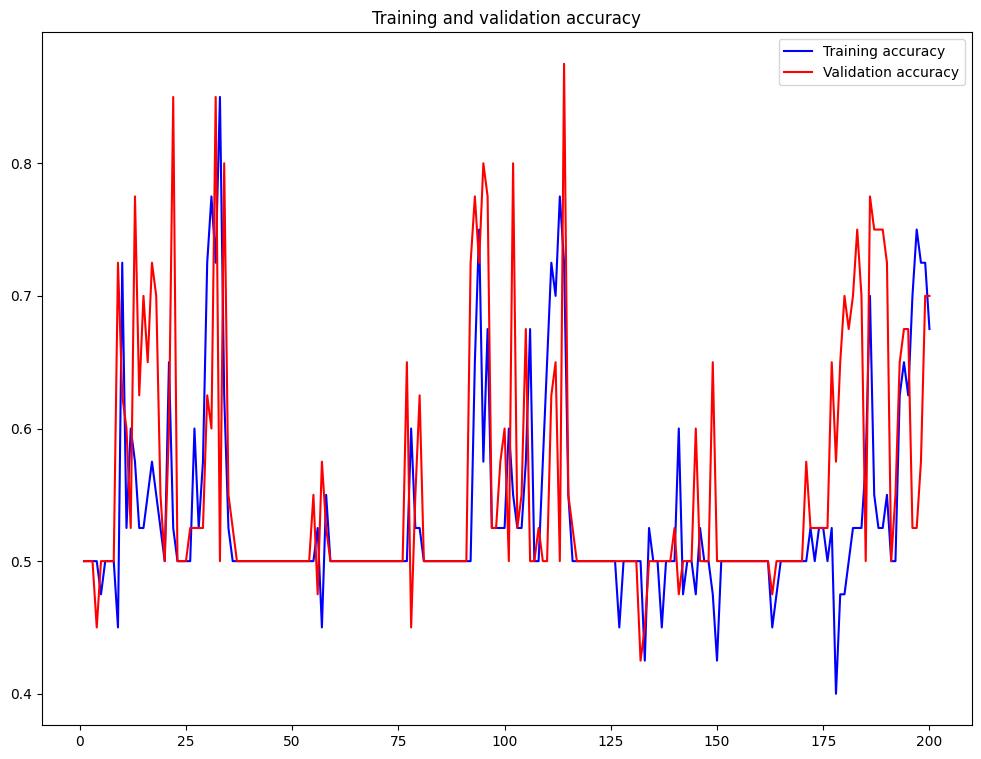

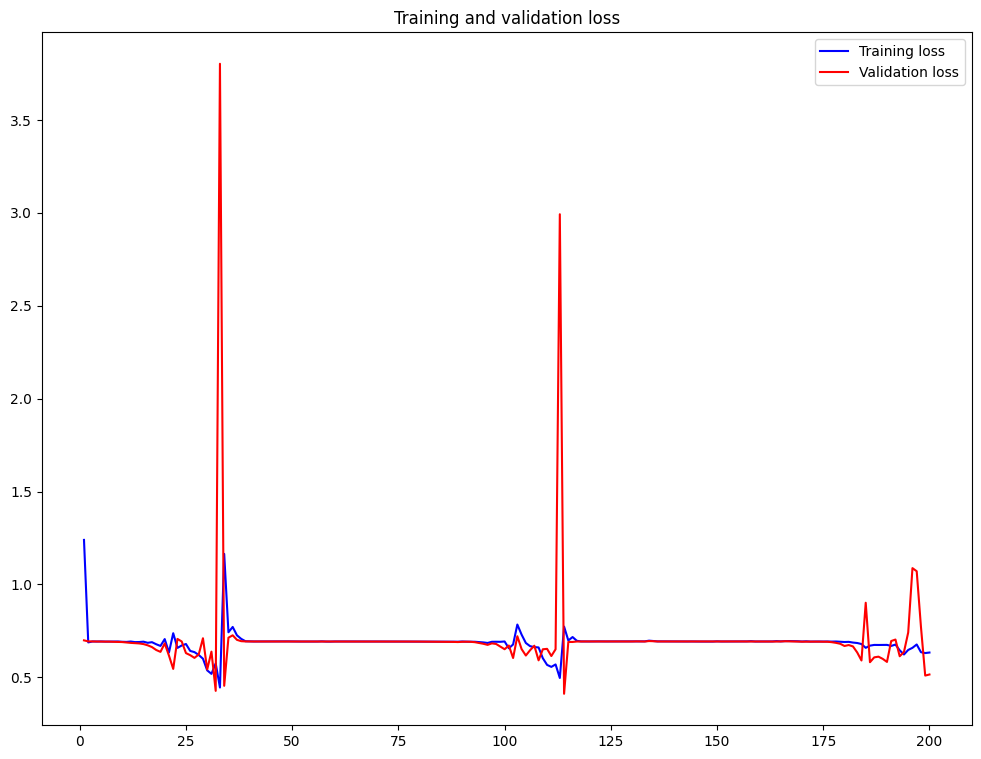

In [43]:
# plot training and validation accuracy and loss
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs= range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()